# Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


# Access the data

In [5]:
df = pd.read_csv('expected_ctc.csv')
df.head()


,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


# Obtain the dimensions of the data

In [6]:
df.shape

(25000, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

# Remove unwanted columns

In [8]:
df_temp = df.drop(columns=['IDX', 'Applicant_ID'])

# Find number of unique values per column

In [9]:
df_temp.nunique()

Total_Experience                        26
Total_Experience_in_field_applied       26
Department                              12
Role                                    24
Industry                                11
Organization                            16
Designation                             18
Education                                4
Graduation_Specialization               11
University_Grad                         13
Passing_Year_Of_Graduation              35
PG_Specialization                       11
University_PG                           13
Passing_Year_Of_PG                      36
PHD_Specialization                      11
University_PHD                          13
Passing_Year_Of_PHD                     26
Curent_Location                         15
Preferred_location                      15
Current_CTC                          23992
Inhand_Offer                             2
Last_Appraisal_Rating                    5
No_Of_Companies_worked                   7
Number_of_P

In [10]:
df_temp.describe()

,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
count,25000.000000,25000.000000,18820.000000,17308.000000,13119.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04
mean,12.493080,6.258200,2002.193624,2005.153571,2007.396372,1.760945e+06,3.482040,4.089040,0.773680,0.081720,2.250155e+06
std,7.471398,5.819513,8.316640,9.022963,7.493601,9.202125e+05,1.690335,2.606612,1.199449,0.273943,1.160480e+06
min,0.000000,0.000000,1986.000000,1988.000000,1995.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.037440e+05
25%,6.000000,1.000000,1996.000000,1997.000000,2001.000000,1.027312e+06,2.000000,2.000000,0.000000,0.000000,1.306278e+06
50%,12.000000,5.000000,2002.000000,2006.000000,2007.000000,1.802568e+06,3.000000,4.000000,0.000000,0.000000,2.252136e+06
75%,19.000000,10.000000,2009.000000,2012.000000,2014.000000,2.443883e+06,5.000000,6.000000,1.000000,0.000000,3.051354e+06
max,25.000000,25.000000,2020.000000,2023.000000,2020.000000,3.999693e+06,6.000000,8.000000,5.000000,1.000000,5.599570e+06


# Find how many null(missing) values there are in the database

In [11]:
df_temp.isnull().sum()

Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Appraisal_Rating                  908
No_Of_Companies_worked                   0
Number_of_P

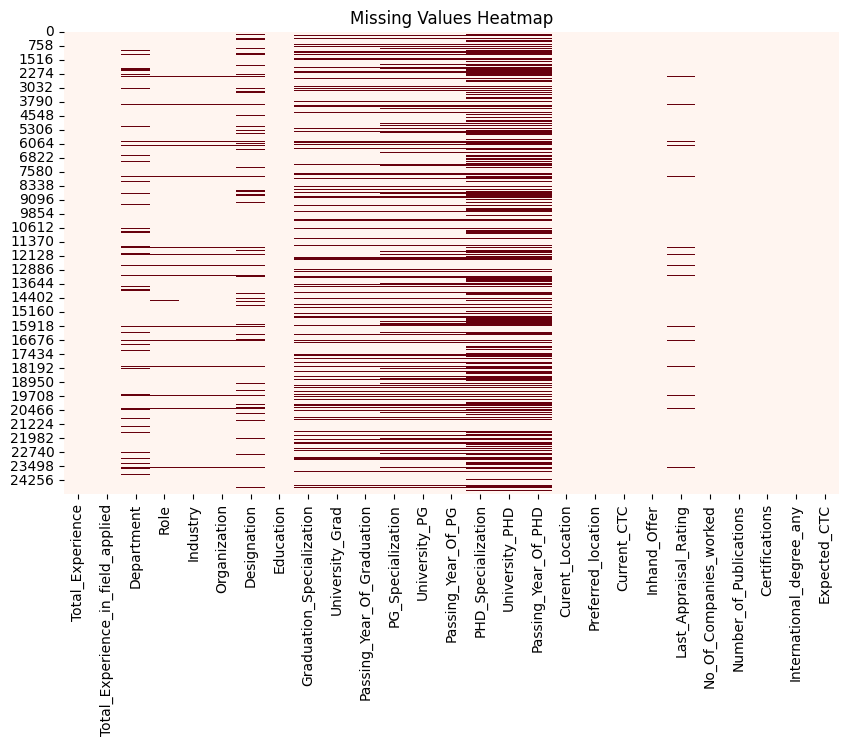

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df_temp.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()

# Replace the missing values with 0

In [13]:
df_temp = df_temp.fillna('0')

# Confirm that there are no more missing values

In [14]:
df_temp.isnull().sum()

Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Organization                         0
Designation                          0
Education                            0
Graduation_Specialization            0
University_Grad                      0
Passing_Year_Of_Graduation           0
PG_Specialization                    0
University_PG                        0
Passing_Year_Of_PG                   0
PHD_Specialization                   0
University_PHD                       0
Passing_Year_Of_PHD                  0
Curent_Location                      0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any 

In [15]:
df_temp.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,0,0,0,0,0,PG,Arts,Lucknow,2020.0,0,0,0,0,0,0,Guwahati,Pune,0,N,0,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,J,0,Doctorate,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


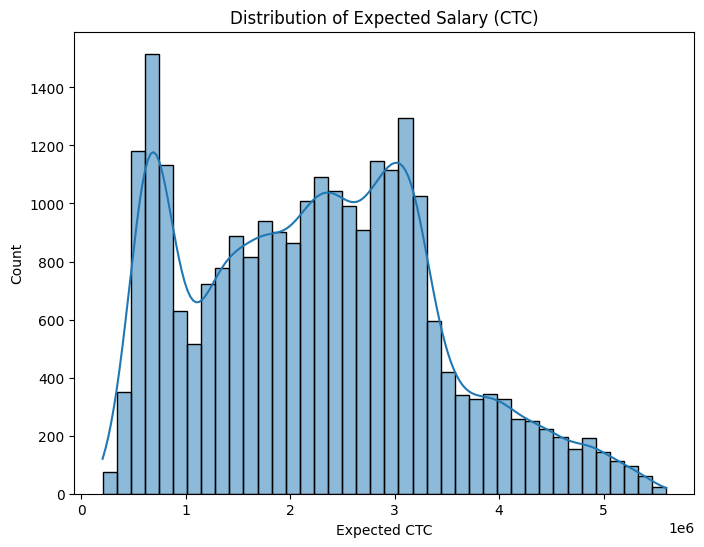

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(df_temp['Expected_CTC'], kde=True, bins=40)
plt.title("Distribution of Expected Salary (CTC)")
plt.xlabel("Expected CTC")
plt.ylabel("Count")
plt.show()

# Obtain all the columns

In [17]:
df_temp.columns = df_temp.columns.str.strip()

skip_cols = ['Passing_Year_Of_Graduation', 'Passing_Year_Of_PG', 'Passing_Year_Of_PHD', 
             'Total_Experience', 'Total_Experience_in_field_applied', 'Expected_CTC']


# Encode all values except for those in numeric columns(defined above)

In [18]:


for col in df_temp.select_dtypes(include='object').columns:
    if col not in skip_cols:
        df_temp[col] = LabelEncoder().fit_transform(df_temp[col].astype(str))

# Obtain the correlation heatmap

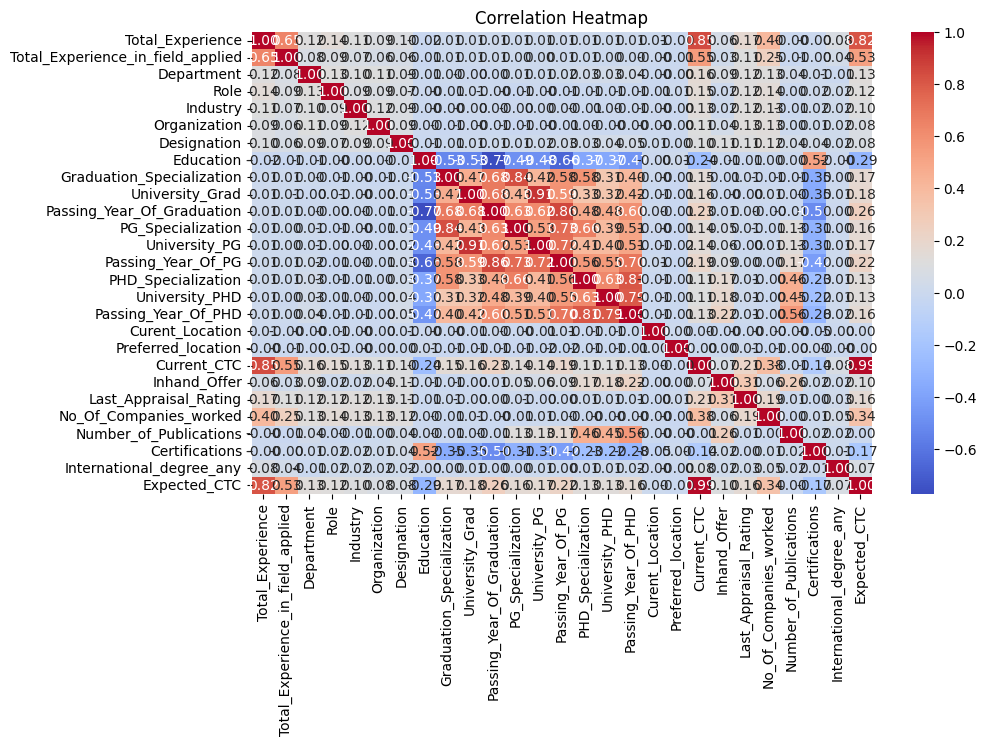

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df_temp.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Make sure no column is in object datatype

In [20]:
for col in skip_cols:
    df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')
    df_temp[col] = df_temp[col].fillna(0)

In [21]:

df_temp['Passing_Year_Of_PHD']


0           0.0
1        1997.0
2        1999.0
3        2005.0
4        2010.0
          ...  
24995    2002.0
24996       0.0
24997       0.0
24998       0.0
24999    2012.0
Name: Passing_Year_Of_PHD, Length: 25000, dtype: float64

In [22]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  int64  
 3   Role                               25000 non-null  int64  
 4   Industry                           25000 non-null  int64  
 5   Organization                       25000 non-null  int64  
 6   Designation                        25000 non-null  int64  
 7   Education                          25000 non-null  int64  
 8   Graduation_Specialization          25000 non-null  int64  
 9   University_Grad                    25000 non-null  int64  
 10  Passing_Year_Of_Graduation         25000 non-null  float64
 11  PG_Specialization                  25000 non-null  int

# Split into variables(input) and target(output)

In [23]:
X = df_temp.drop(columns=['Expected_CTC'])
y = df_temp['Expected_CTC']

# Obtain test and train data for each X and y

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now train a model that takes input and gives expected CTC

## First model -> Random Forest

In [25]:
Rand_model = RandomForestRegressor(n_estimators=100, random_state=42)
Rand_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Obtain mean squared error and r2 score in order to evaluate its performance

In [27]:
y_pred = Rand_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  617374786.6092924
R^2 Score:  0.9995435226531463


## Now plot the predicted values of the model vs the actual values

### Set X and Y axis variables

In [28]:
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

### Define what type of graph u want

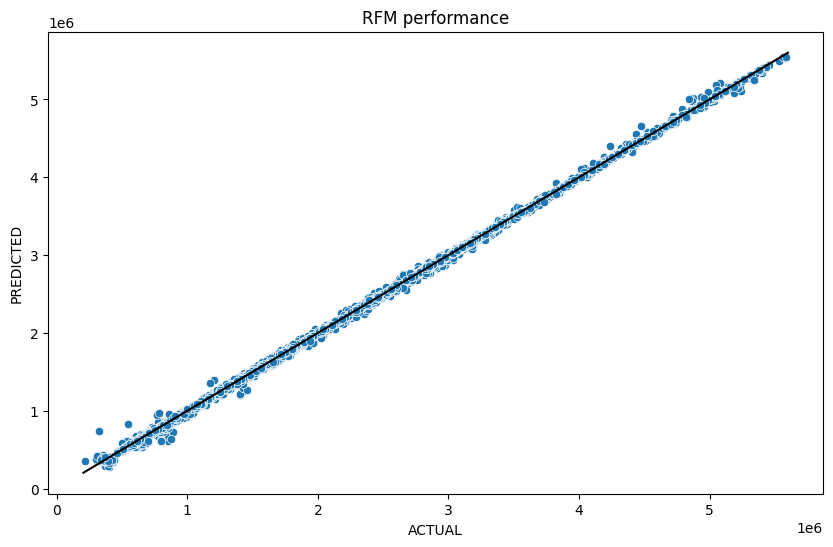

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Actual', y='Predicted', data=comp)
plt.title("RFM performance")

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k')

plt.xlabel("ACTUAL")
plt.ylabel("PREDICTED")
plt.show()